# Zoom de región/regiones con más casos, y se hace un zoom a nivel de comunas

## Set de datos

In [1]:
import sys
import os
project_path = os.path.abspath('../')
sys.path.insert(1, project_path)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime as dt
import geopandas as gpd
import folium

sns.set_style('darkgrid')

## Descripción de base de datos

| Campos            | Descripción | Relevante |
| ----------------- | ----------- | :----------: |
| ProcesoSancionId | Identificador único numérico de la fiscalización | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| Expediente | Expediente de la fiscalización. Corresponde a un identificador único (texto) | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| ProcesoSancionTipoNombre | Indica la tipología del proceso de sanción según su origen: Autodenuncia, Fiscalización, Denuncia o Programa de Cumplimiento | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| ProcesoSancionEstado | Indica diferentes estados del proceso de sanción |  <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| FechaInicio | Fecha de inicio del proceso sancionatorio | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| FechaTermino | Fecha de inicio del proceso sancionatorio, si la hubiera | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| ConfirmaPdC | Si el titular presentó o no un programa de cumplimiento |<table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table> |
| MultaTotalUTA | Multa total del proceso sancionatorio media en Unidades Tributarias Anuales, si la hubiera | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| LinkSNIFA | Link de SNIFA con la información documental de la fiscalización |<table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table> |
| UnidadFiscalizableId | Identificador único numérico de la Unidad Fiscalizable | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| Nombre | Nombre de la Unidad Fiscalizable. El nombre de las UF de subcategoría | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| RegionNombre | Nombre de la región donde está ubicada la Unidad Fiscalizable | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| ComunaNombre | Nombre de la comuna donde está ubicada la Unidad Fiscalizable | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| Latitud | Latitud de la Unidad Fiscalizable en coordenadas geodésicas representadas en grados decimales (datum WGS84). La ubicación para las UF de subcategoría económica “Casa-habitación” se consideran datos privados o sensibles por lo que son dejadas en blanco (NA) |  <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| Longitud | Longitud de la Unidad Fiscalizable en coordenadas decimales (datum WGS84). La ubicación para las UF de subcategoría económica “Casa-habitación” se consideran datos privados o sensibles por lo que son dejadas en blanco (NA) | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| CategoriaEconomicaNombre | Categoría económica o rubro de la Unidad Fiscalizable | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| SubCategoriaEconomicaNombre | Segundo nivel de detalle del rubro o categoría económica de la UF | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| LinkSNIFA_UF | Link web con la ficha de la Unidad Fiscalizable en SNIFA | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| FechaActualizacion | Fecha cuando el presente archivo fue actualizado | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|

In [4]:
data

,NOM_COM,REGION,PROV,CODIGO,geometry
0,Ercilla,Región de La Araucanía,Malleco,9204,"POLYGON ((-72.52316 -37.94412, -72.52224 -37.9..."
1,Lonquimay,Región de La Araucanía,Malleco,9205,"POLYGON ((-71.34596 -38.08866, -71.34527 -38.0..."
2,Los Sauces,Región de La Araucanía,Malleco,9206,"POLYGON ((-72.91459 -37.83951, -72.91432 -37.8..."
3,Lumaco,Región de La Araucanía,Malleco,9207,"POLYGON ((-72.88079 -38.07505, -72.87878 -38.0..."
4,Purén,Región de La Araucanía,Malleco,9208,"POLYGON ((-73.03074 -37.84025, -73.02991 -37.8..."
...,...,...,...,...,...
341,Pica,Región de Tarapacá,Iquique,1405,"POLYGON ((-68.74593 -20.12210, -68.74588 -20.1..."
342,Huara,Región de Tarapacá,Iquique,1404,"POLYGON ((-69.68828 -18.96902, -69.68823 -18.9..."
343,Villa Alemana,Región de Valparaíso,Marga Marga,5804,"POLYGON ((-71.28841 -33.04483, -71.28822 -33.0..."
344,Limache,Región de Valparaíso,Marga Marga,5802,"POLYGON ((-71.42506 -32.91814, -71.42438 -32.9..."


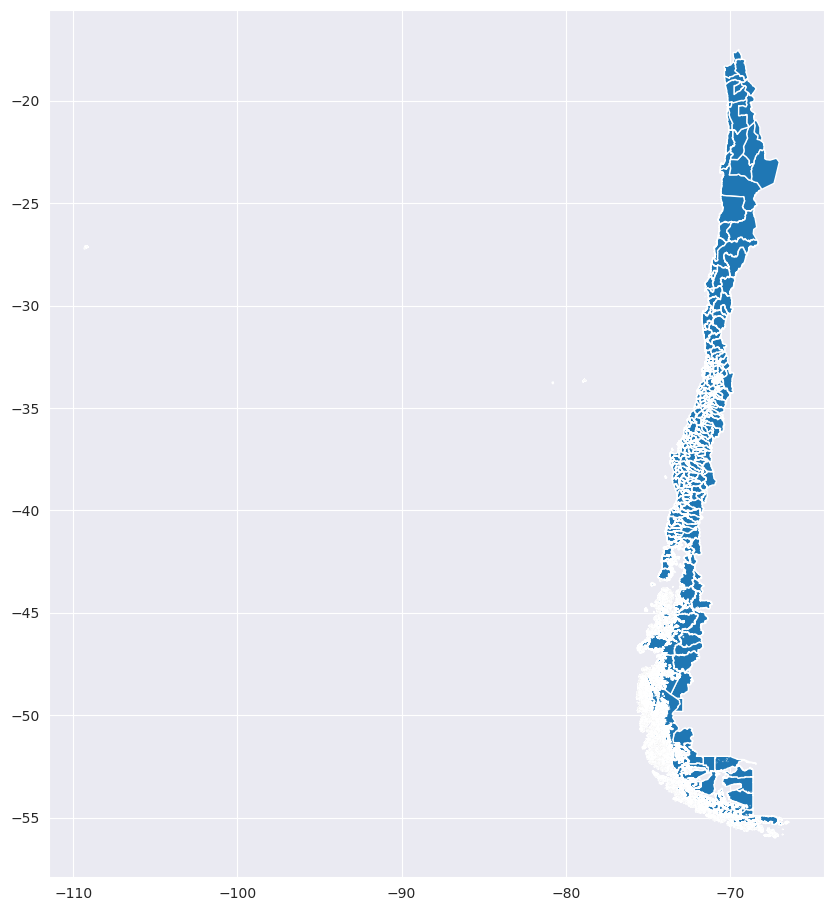

In [6]:
# Cargar el archivo .shp utilizando geopandas
shapefile_path = '../data/mapas/comunas/comunas.shp'
data = gpd.read_file(shapefile_path)

fig, ax = plt.subplots(figsize=(10, 20))
# Graficar el mapa
data.plot(ax=ax)

# Mostrar el gráfico
plt.show()


In [2]:

# Cargar el archivo .shp utilizando geopandas
shapefile_path = '../data/mapas/comunas/comunas.shp'
data = gpd.read_file(shapefile_path)

# Crear un objeto de mapa de folium
mapa = folium.Map(location=[data.geometry.centroid.y.mean(), data.geometry.centroid.x.mean()], zoom_start=10)

# Agregar los datos del archivo .shp al mapa
folium.GeoJson(data).add_to(mapa)

# Mostrar el mapa interactivo
mapa.save('mapa_interactivo.html')


/tmp/ipykernel_10959/303113076.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mapa = folium.Map(location=[data.geometry.centroid.y.mean(), data.geometry.centroid.x.mean()], zoom_start=10)


## Carga de datos

In [ ]:
df = pd.read_excel('../data/Sancionatorios_Act2023-04-19.xlsx',sheet_name='Sheet 1')

# Se descartan columnas no relevantes
df.drop(columns=['ProcesoSancionId', 'UnidadFiscalizableId','LinkSNIFA', 'LinkSNIFA_UF', 'FechaActualizacion','Expediente','Nombre'], axis=1, inplace=True)

df.head()

In [48]:
print('Columnas de datos originales:')
print(df.loc[~df['NOM_COM'].isin(data['NOM_COM']), 'NOM_COM'].unique())

print('\nColumnas de geodatos:')
print(data.loc[~data['NOM_COM'].isin(df['NOM_COM']), 'NOM_COM'].unique())

Columnas de datos originales:
[]

Columnas de geodatos:
['Ercilla' 'Lonquimay' 'Los Sauces' 'Lumaco' 'Traiguén' 'Puqueldón'
 'Queilén' 'Chaitén' 'Futaleufú' 'Hualaihué' 'Palena' 'Futrono'
 "O'Higgins" 'Coinco' 'Coltauco' 'Las Cabras' 'Pichidegua' 'Navidad'
 'Paredones' 'Chépica' 'Lolol' 'Nancagua' 'Placilla' 'Pumanque' 'Paiguano'
 'Río Hurtado' 'Cholchol' 'Curarrehue' 'Galvarino' 'Saavedra'
 'Teodoro Schmidt' 'Toltén' 'Negrete' 'Quilaco' 'Quilleco' 'San Rosendo'
 'Santa Bárbara' 'Hualqui' 'Lota' 'Coelemu' 'El Carmen' 'Ninhue' 'Ñiquén'
 'Pinto' 'Portezuelo' 'Quirihue' 'San Nicolás' 'Yungay' 'Chanco'
 'María Pinto' 'Lo Prado' 'Hualañé' 'Rauco' 'Romeral' 'Curepto'
 'Empedrado' 'Zona sin demarcar' 'General Lagos' 'Rinconada' 'San Esteban'
 'Papudo' 'Petorca' 'Zapallar' 'Contulmo' 'Tirúa' 'Antuco' 'Laja'
 'Peñaflor' 'Timaukel' 'Chile Chico' 'Lago Verde' 'Tortel' 'Cochrane'
 'Isla de Pascua' 'Colchane']


### Se renombran aquellas comunas que tienen sanciones y si se encuentran en ambos DataFrames

In [27]:
df.rename(columns={'ComunaNombre': 'NOM_COM'}, inplace=True)

df['NOM_COM'] = df['NOM_COM'].replace({'Til til': 'Tiltil', 'Padre las Casas': 'Padre Las Casas', 'Ránquil': 'Ranquil',
                                       'Ollague': 'Ollagüe', 'Llay Llay': 'Llaillay', 'Trehuaco': 'Treguaco',
                                       'San Juan de La Costa': 'San Juan de la Costa'})

In [49]:
temp = pd.merge(data, df.groupby('NOM_COM').agg(N=('ProcesoSancionTipoNombre', 'count')), on='NOM_COM')

## Mayores sanciones por región y por comuna

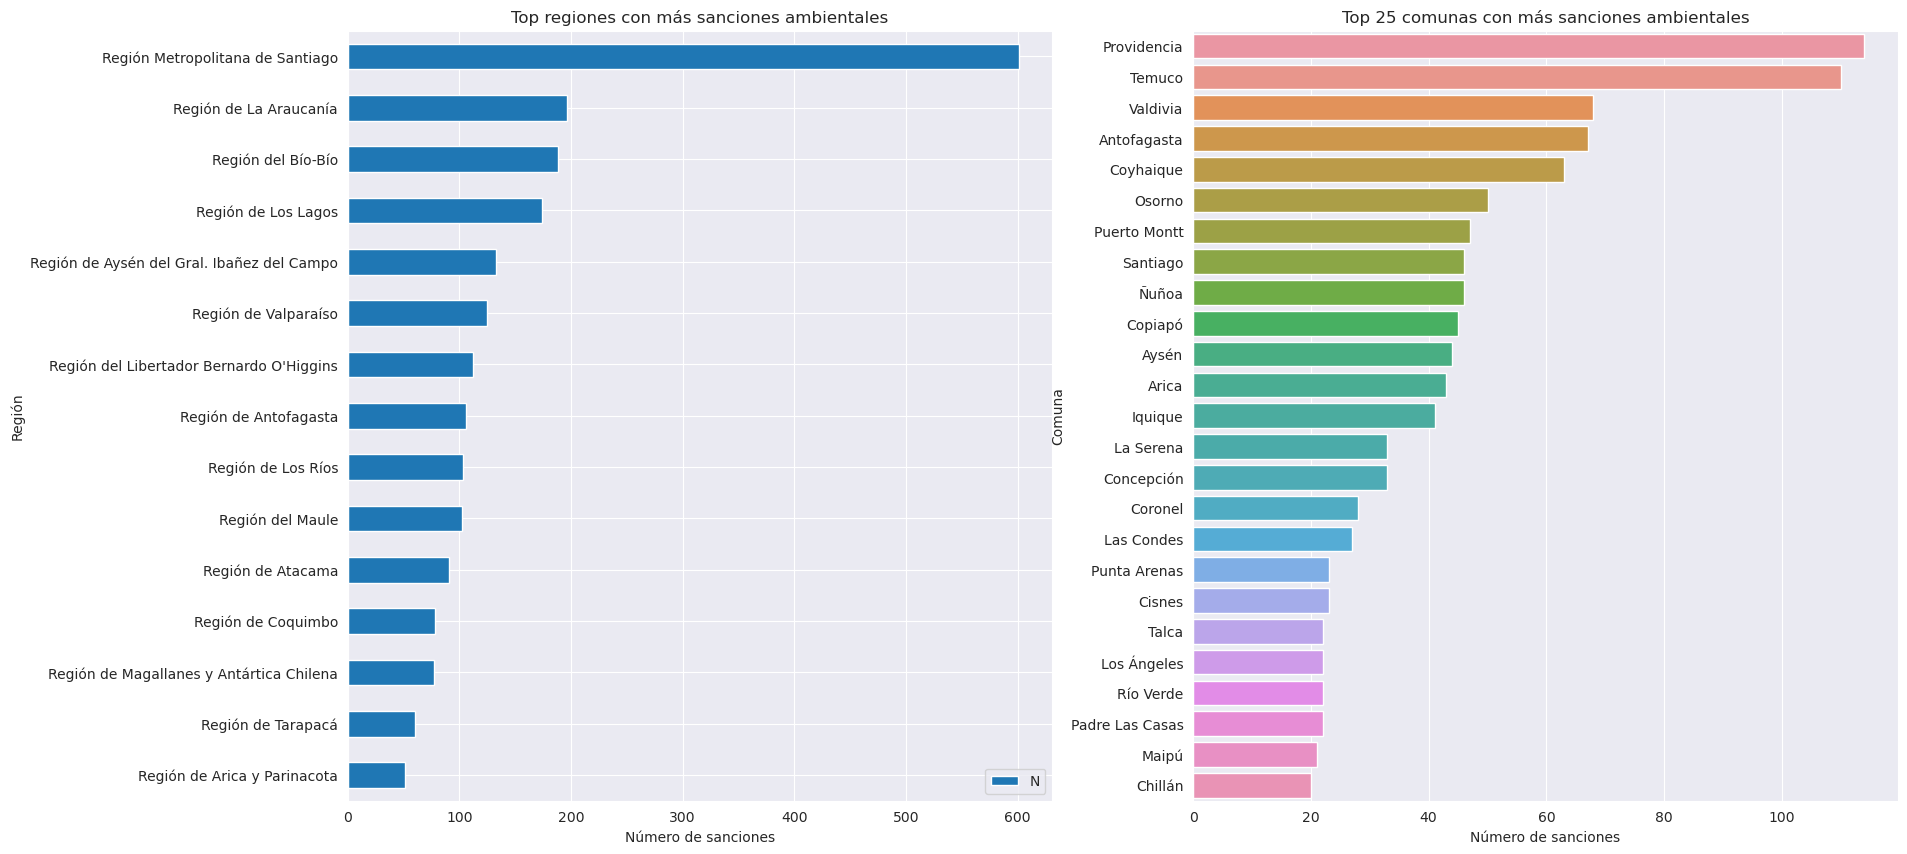

In [68]:
# make a bar horizontal plot of 'temp' dataframe with the column 'N' grouped by REGION and ordered decreasingly
fig, ax = plt.subplots(1, 2, figsize=(20,10))

temp.groupby('REGION').agg(N=('N', 'sum')).sort_values(by='N', ascending=True).plot(kind='barh', ax=ax[0])

ax[0].set_title('Top regiones con más sanciones ambientales')
ax[0].set_xlabel('Número de sanciones')
ax[0].set_ylabel('Región')

sns.barplot(x='N', y='NOM_COM', data=temp.sort_values('N', ascending=False).head(25), ax=ax[1])
ax[1].set_title('Top 25 comunas con más sanciones ambientales')
ax[1].set_xlabel('Número de sanciones')
ax[1].set_ylabel('Comuna')

plt.show()

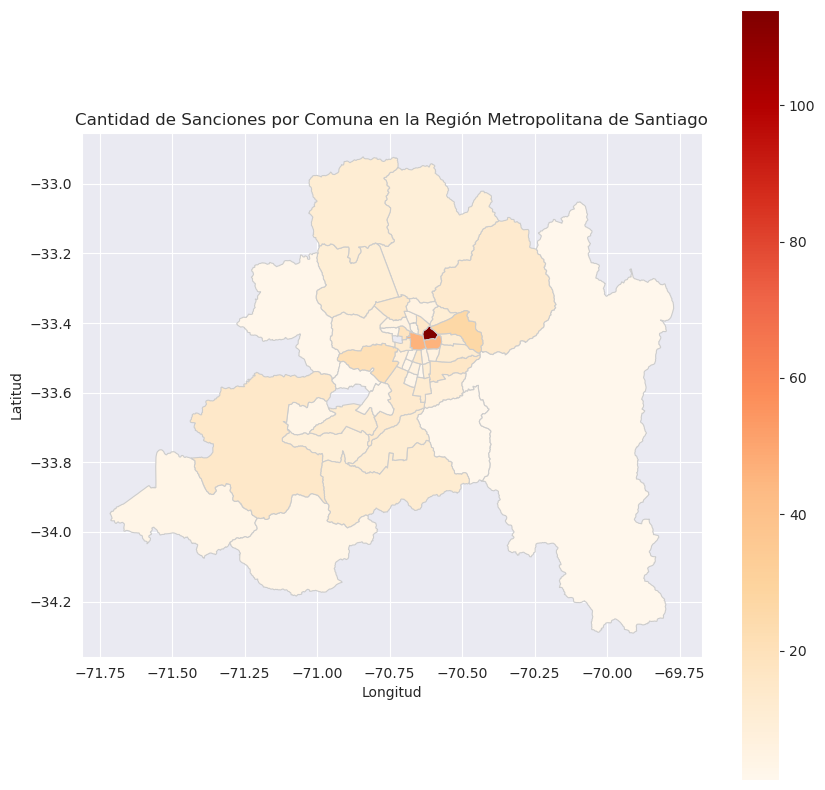

In [60]:
# Graficar el mapa
fig, ax = plt.subplots(figsize=(10, 10))
temp[temp['REGION'] == 'Región Metropolitana de Santiago'].plot(column='N', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Añadir título y etiquetas
ax.set_title('Cantidad de Sanciones por Comuna en la Región Metropolitana de Santiago')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el gráfico
plt.show()


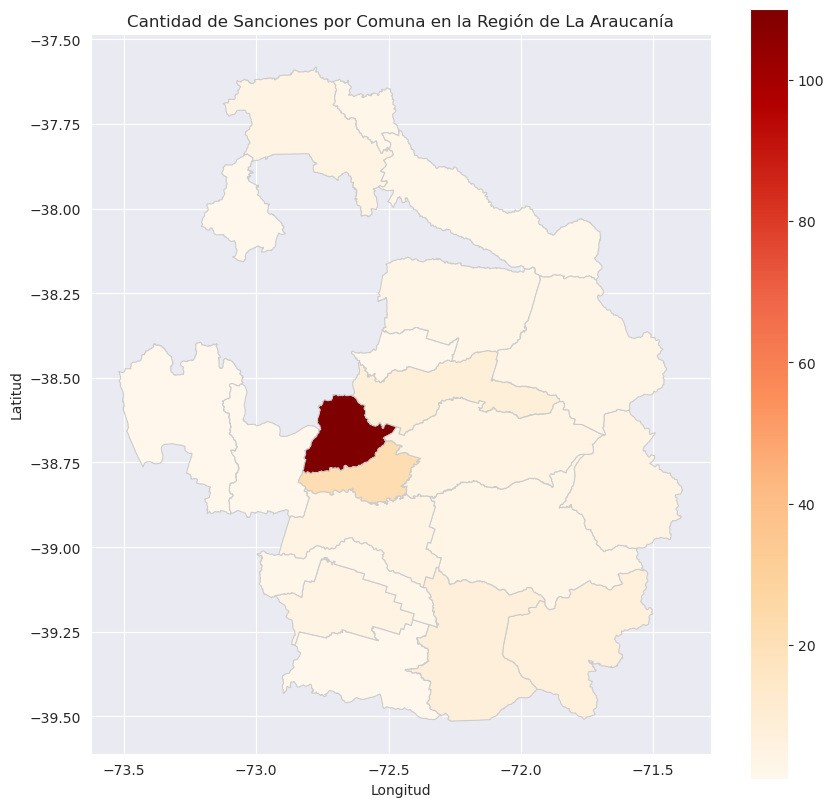

In [69]:
# Graficar el mapa
fig, ax = plt.subplots(figsize=(10, 10))
temp[temp['REGION'] == 'Región de La Araucanía'].plot(column='N', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Añadir título y etiquetas
ax.set_title('Cantidad de Sanciones por Comuna en la Región de La Araucanía')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el gráfico
plt.show()


## Procedimiento

In [3]:
df['FechaInicio'] = pd.to_datetime(df['FechaInicio'], dayfirst=True)
df['FechaTermino'] = pd.to_datetime(df['FechaTermino'], dayfirst=True)

In [4]:
deltaFecha = df['FechaTermino'] - df['FechaInicio']

<AxesSubplot:>

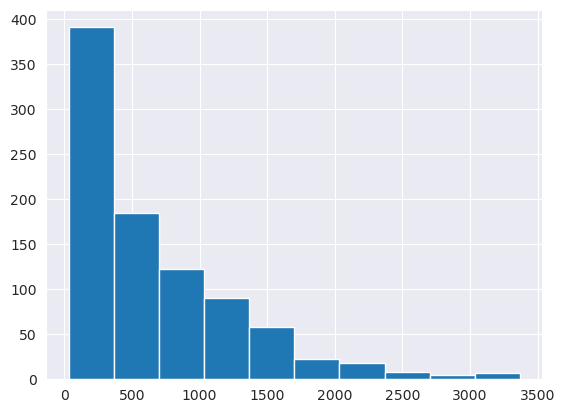

In [12]:
deltaFecha.dt.days.hist()

In [18]:
deltaFecha.isna().value_counts()

True     1289
False     908
dtype: int64

In [16]:
df['ProcesoSancionEstado'].value_counts()

En curso                                 699
Terminado - Sanción                      571
Programa de Cumplimiento en ejecución    487
Terminado - PDC Satisfactorio            339
Terminado - Absolución                    45
Terminado - Archivado                     36
Suspendido                                20
Name: ProcesoSancionEstado, dtype: int64

In [15]:
df.loc[deltaFecha.isna(), 'ProcesoSancionEstado'].value_counts()

En curso                                 664
Programa de Cumplimiento en ejecución    487
Terminado - Sanción                      109
Suspendido                                20
Terminado - Absolución                     9
Name: ProcesoSancionEstado, dtype: int64

In [23]:
temp = pd.DataFrame(dict(xmin=[dt.strptime('1994-07-19', '%Y-%m-%d'),
   dt.strptime('2006-03-16', '%Y-%m-%d'),
   dt.strptime('1980-10-31', '%Y-%m-%d'),
   dt.strptime('1981-06-11', '%Y-%m-%d'),
   dt.strptime('2006-06-28', '%Y-%m-%d')],
   xmax=[dt.strptime('1998-06-30', '%Y-%m-%d'),
   dt.strptime('2007-01-24', '%Y-%m-%d'),
   dt.strptime('2007-07-31', '%Y-%m-%d'),
   dt.strptime('1990-08-01', '%Y-%m-%d'),
   dt.strptime('2007-01-24', '%Y-%m-%d')]
))

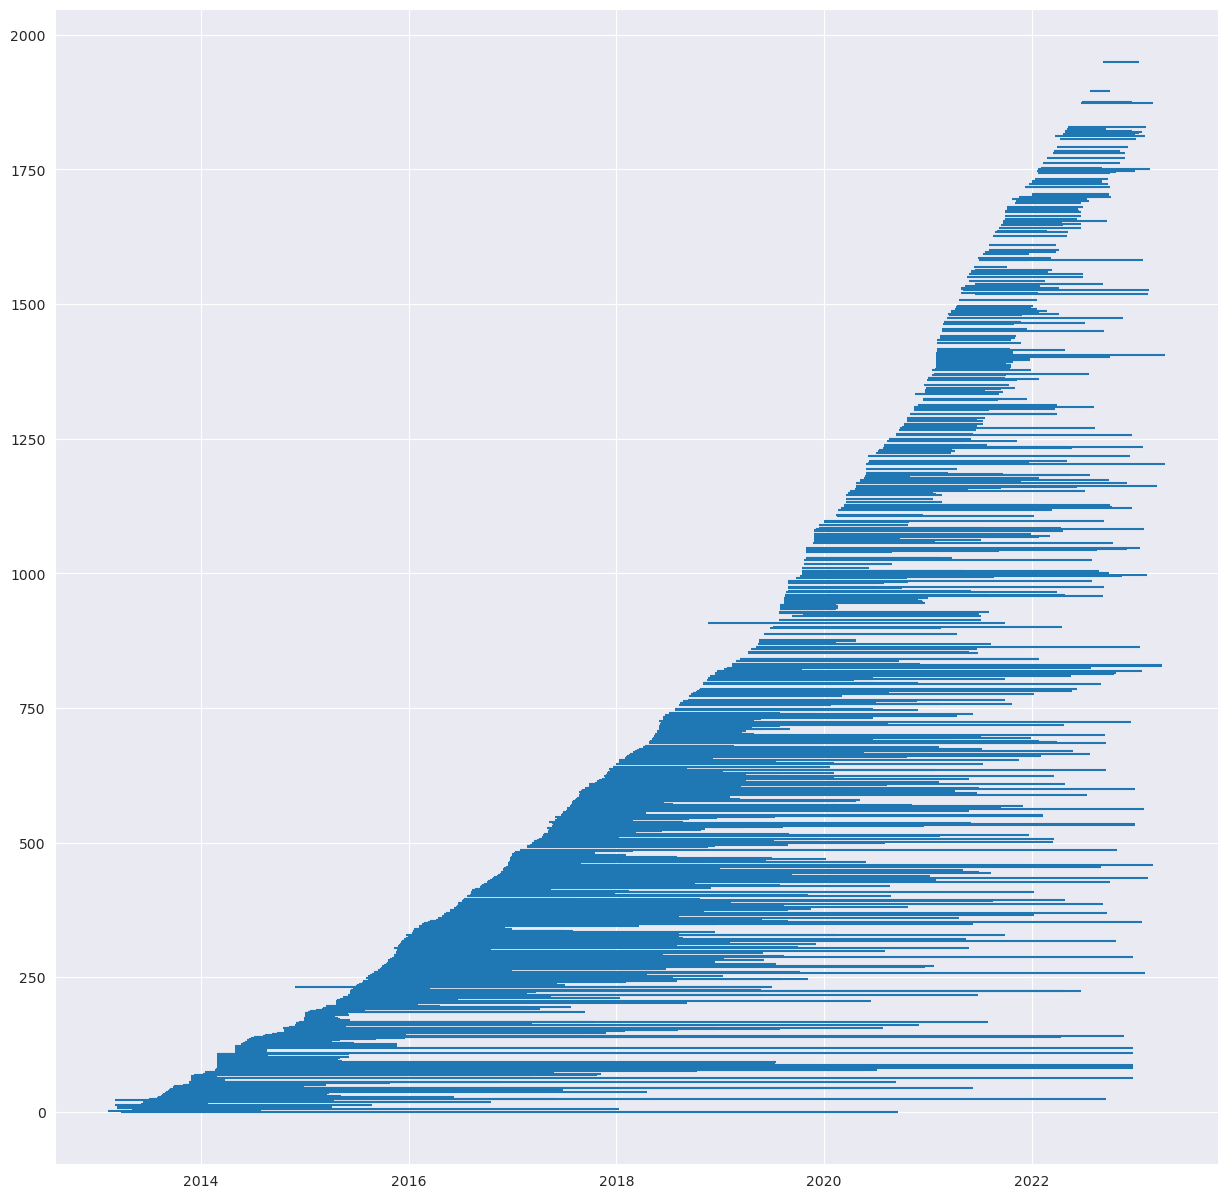

In [32]:
fig, ax = plt.subplots(figsize=(15,15))

ax.hlines(df.index, df['FechaInicio'], df['FechaTermino'])

## Valores nulos

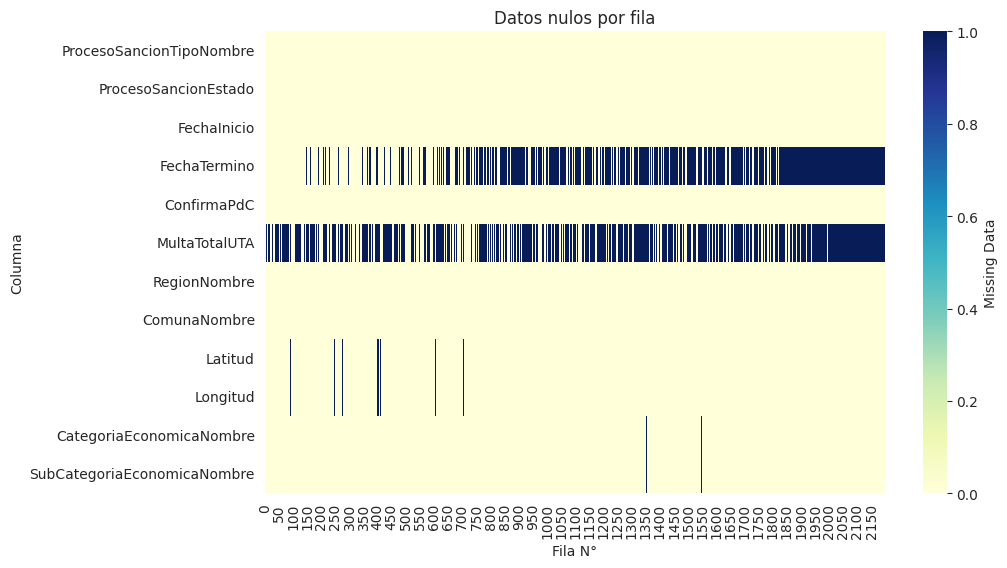

In [6]:
fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'},
            ax=ax)

ax.set_title('Datos nulos por fila')
ax.set_xlabel('Fila N°')
ax.set_ylabel('Columna')
plt.show()

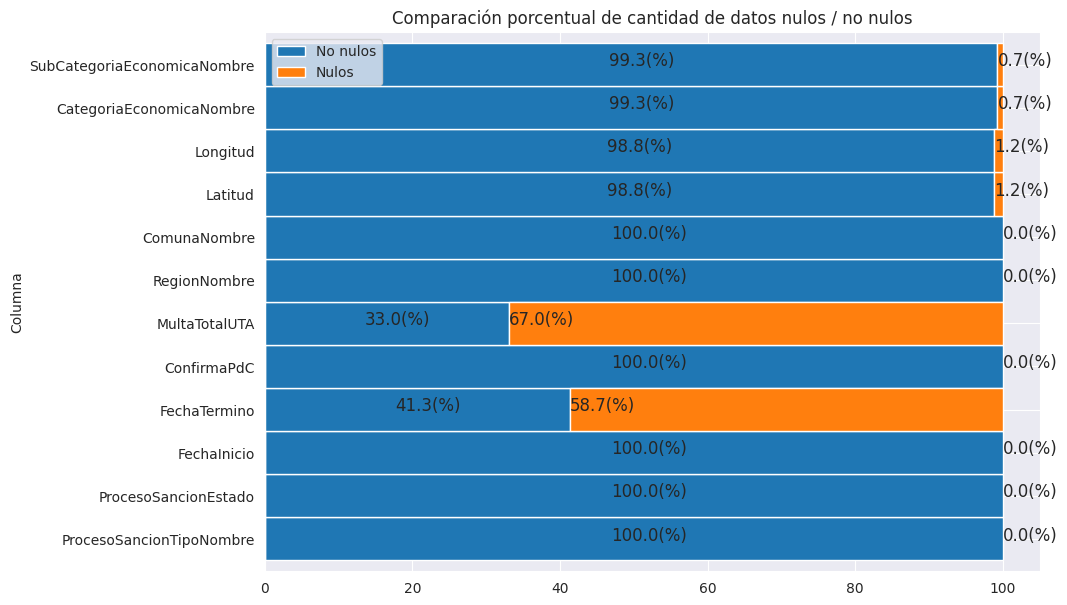

In [7]:
temp = (df.count() / df.shape[0] * 100).reset_index()
temp.rename(columns={'index':'Columna', 0:'No nulos'}, inplace=True)
temp['Nulos'] = (df.isna().sum() / df.shape[0]).values * 100


fig, ax = plt.subplots(figsize=(10, 7))

temp.plot(
    x = 'Columna',
    kind = 'barh',
    stacked = True,
    title = 'Comparación porcentual de cantidad de datos nulos / no nulos',
    mark_right = True,
    width=1,
    ax=ax)

for idx in range(temp.shape[0]):
    ax.text(temp.iloc[idx, 1] / 2 - 3, idx / 1 + 0.3, '{:.1f}(%)'.format(temp.iloc[idx, 1]), fontsize=12,
                verticalalignment='top')

    ax.text(temp.iloc[idx, 1]+0.04, idx / 1 + 0.3, '{:.1f}(%)'.format(temp.iloc[idx, 2]), fontsize=12,
                verticalalignment='top')

plt.show()

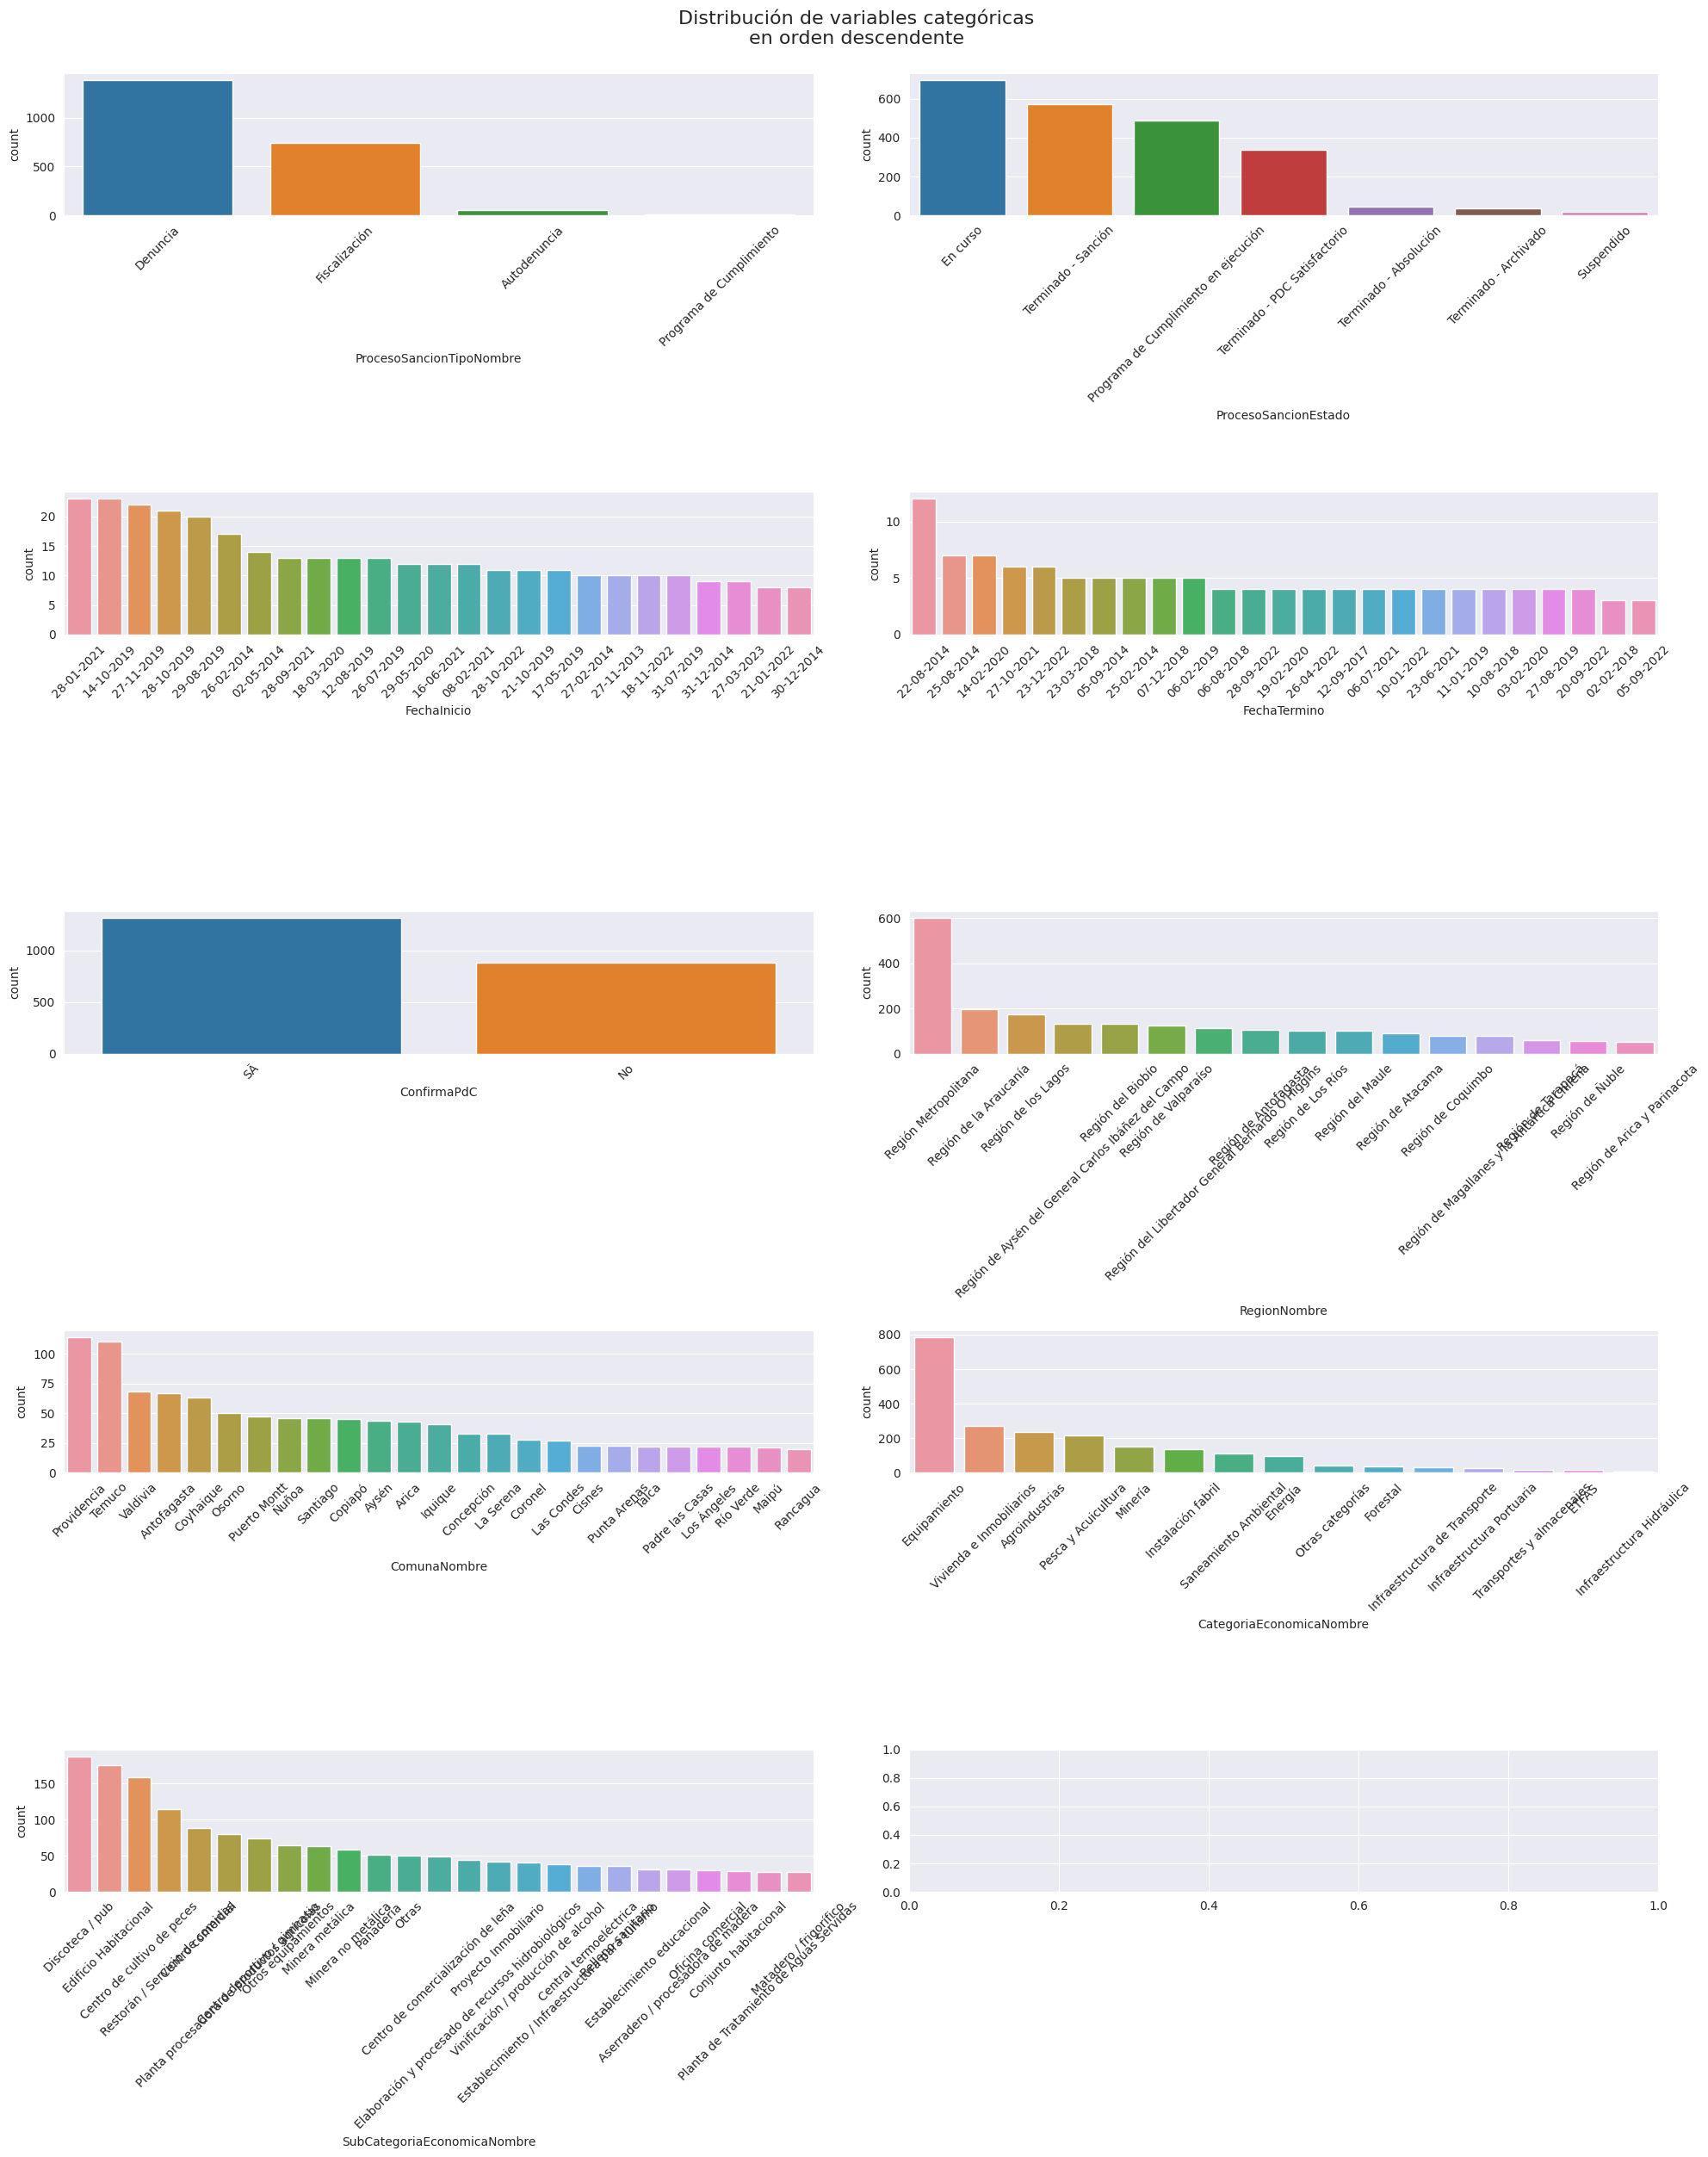

In [8]:
cat_distribution(df)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=408a1127-a110-4797-8d5d-2cf2d5cd92ef' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>